# Simulation of Linear Time-Invariant Systems

## Spring-mass system

Lets consider more generic: $u(t) - kx(t) - b\dot{x}(t) = m\ddot{x}(t)$, for double integrator case: k=0, b=0, m=1

Note the steady state position $x(\infty) = \frac u k$

$\omega_0 = \sqrt \frac k m$,  damping ratio: $\zeta  = \frac b {2 \sqrt {mk}}$ >1: overdamped, <1: underdamped

$x(t) = x_1$

$\dot{x}(t) = x_2 = \dot{x_1}$

$u(t) = u1$

Now, the space state equation becomes: $u - kx_1 -bx_2 = m\dot x_2$

$\dot x_1 = 0 x_1 + 1 x_2 + 0 u_1$

$\dot x_2 = - \frac k m x_1 - \frac b m x_2 + \frac 1 m u_1$

for y:   $y = 1 x_1 + 0 x_2 + 0 u$

We need to write it in state space form:

$\dot x = Ax + Bu$

$y = Cx + Du$

$A = \begin{bmatrix} 0 & 1 \\- \frac k m & - \frac b m\\ \end{bmatrix}$,
$B = \begin{bmatrix} 0 \\ \frac 1 m \end{bmatrix}$,
$C = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, D = 0 $

In [11]:
import numpy as np
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
def spring_mass_system(m,b,k):
    ssA = [[0., 1.], [-k/m, -b/m]]
    ssB = [[0.], [1./m]]
    ssC = [[1., 0.]]
    ssD = 0.
    return signal.lti(ssA,ssB,ssC,ssD)

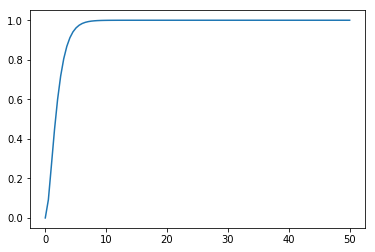

In [13]:
m,b,k = 1., 2., 1.
t = np.linspace(0, 50,100)
u = np.ones_like(t)
initial_state = [0.,0.]
tout, y, x = signal.lsim(spring_mass_system(m,b,k), u, t, X0=initial_state)
plt.plot(t, y)
plt.show()

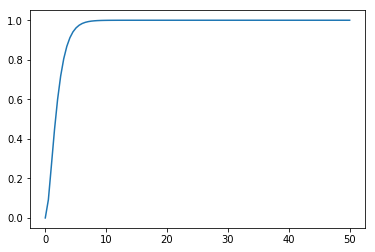

In [5]:
tout, y, x = signal.lsim(spring_mass_system(m,b,k), u, t, X0=initial_state)
#tout, y, x = signal.lsim(system, u, t, X0=initial_state)
plt.plot(t, y)
plt.show()

----------------------------------------------------------------------
## RLC Cirquit

![title](rlc.png)

$V_L = L\frac {\partial i}{\partial t}$,
$i = C\frac {\partial V_C}{\partial t}$

Ohm equation: $V = iR + L \frac{\partial i}{\partial t} + V_C$

Note, this is equivalent to spring-mass with m = LC, b = RC, k = 1

State vectors:

$x = \begin{bmatrix} V_C \\ i \\ \end{bmatrix}$ , $y = \begin{bmatrix} x_1 \\ Rx_2 \\ \end{bmatrix}$

State equations

$ \frac{\partial i}{\partial t} = \frac 1 L u - \frac R L i - \frac 1 L V_C$

$ \frac {\partial V_C}{\partial t} = \frac 1 C i$

We need to write it in state space form:

$\dot x = Ax + Bu$

$y = Cx + Du$

$ \dot x_1 = 0 x_1 + \frac 1 C x_2 + 0u $

$ \dot x_2 = - \frac 1 L x_1 - \frac R L x_2 + \frac 1 L u$


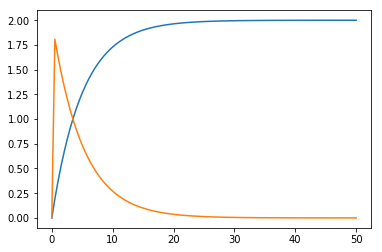

In [4]:
R,L,C = 50., 1.e-3, 1.e-1
ssA = [[0., 1./C], [-1./L, -R/L]]
ssB = [[0.], [1./L]]
ssC = [[1., 0.],[0., R]]
ssD = [[0.],[0.]]
system = signal.lti(ssA,ssB,ssC,ssD)
#print system.poles
t = np.linspace(0, 50,100)
u = np.ones_like(t)*2
tout, y, x = signal.lsim(system, u, t)
plt.plot(t, y)
plt.show()
#print y

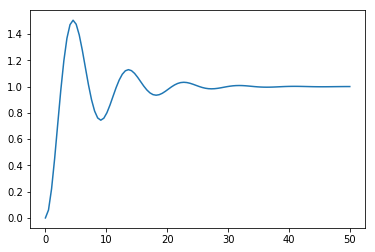

In [5]:
#R,L,C = 50., 1.e-3, 1.e-1 # poles -5e4, -0.2
#R,L,C = .6, 2.,1. # equivalent of spring-mass m=2, b=.6, k=1.
R,L,C = .3, 1.,2. # same, equivalent of spring-mass m=2, b=.6, k=1.
ssA = [[0., 1./C], [-1./L, -R/L]]
ssB = [[0.], [1./L]]
ssC = [[1., 0.]]
ssD = 0.
system = signal.lti(ssA,ssB,ssC,ssD)
t = np.linspace(0, 50,100)
u = np.ones_like(t)*1
tout, y, x = signal.lsim(system, u, t)
plt.plot(t, y)
plt.show()


![title](rlc_transfer_function.png)

In [6]:
print system.poles
print system.zeros

[-0.15+0.69101375j -0.15-0.69101375j]
[]


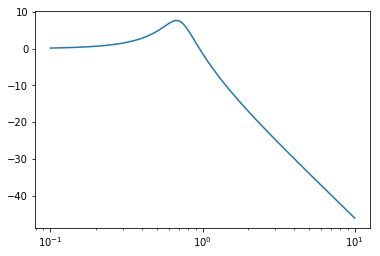

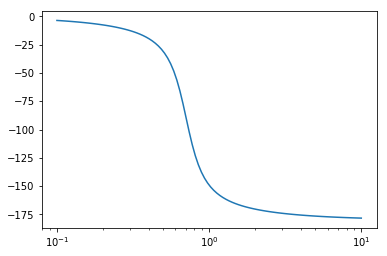

In [7]:
w, mag, phase = system.bode()
plt.figure()
plt.semilogx(w, mag)
plt.figure()
plt.semilogx(w, phase)
plt.show()

 # PID

[-7.23606798 -2.76393202]


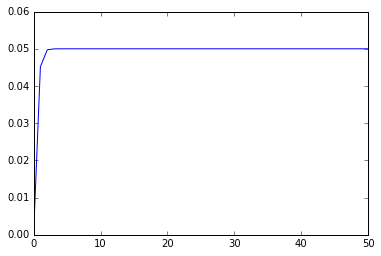

In [26]:
# Let's take spring-mass system
m, b, k = 1., 10., 20. # PID parameters Kp, Ki, Kd = 350., 300., 50.
#m, b, k = 2., 0.6, 1.
system = spring_mass_system(m,b,k)
print system.poles
t = np.linspace(0, 50)
u = np.ones_like(t)
initial_state = [0.,0.]
tout, y, x = signal.lsim(system, u, t, X0=initial_state)
plt.plot(t, y)
plt.show()

In [28]:
def pid_spring_mass(mbk,pid):
    if pid[1] == 0.:
        # P or PD controller
        print 'P/PD'
        num = [pid[2], pid[0]]
        den = [mbk[0], mbk[1] + pid[2], mbk[2] + pid[0]]
    elif pid[2] == 0.:
        # PI or I controller
        print 'PI'
        num = [pid[0], pid[1]]
        den = [mbk[0], mbk[1], mbk[2] + pid[0], pid[1]]
    else:
        # PID controller
        print 'PID'
        num = [pid[2], pid[1], pid[0]]
        den = [mbk[0], mbk[1] + pid[2], mbk[2] + pid[1], pid[0]]
    print('zpk: '+str(signal.tf2zpk(num,den)))
    return signal.lti(num,den)

PID
zpk: (array([-4.41421356, -1.58578644]), array([-54.21684452,  -4.27203547,  -1.51112001]), 50.0)
[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44
  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92
  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32  1.36  1.4
  1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8   1.84  1.88
  1.92  1.96  2.  ]
[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44
  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92
  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32  1.36  1.4
  1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8   1.84  1.88
  1.92  1.96  2.  ]


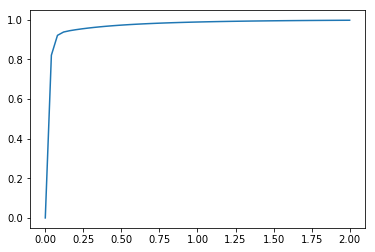

In [31]:
m, b, k = 1., 10., 20.
Kp, Ki, Kd = 350., 300., 50.
#num = [Kd, Kp, Ki]
#den = [m, b+Kd, k+Kp, Ki]
#system = signal.lti(num,den)
system = pid_spring_mass([m,b,k],[Kp, Ki, Kd])
#print system.poles # error here
#print signal.tf2zpk(num,den)
#print pid_spring_mass_zpk([m,b,k],[Kp, Ki, Kd])
t = np.linspace(0, 2, 51)
u = np.ones_like(t)
initial_state = [0.,0.]
tout, y, x = signal.lsim(system, u, t)#, X0=initial_state)
plt.plot(tout, y)
print t
print tout


poles:[-1. -1.]
pid:[2.4, 1.5999999999999999, 0.9]
PID
zpk: (array([-0.88888889+1.36986978j, -0.88888889-1.36986978j]), array([-2.21539438+0.j        , -0.34230281+0.98293303j,
       -0.34230281-0.98293303j]), 0.90000000000000002)
PID
zpk: (array([-2.        , -0.71428571]), array([-1.03889671+0.72655137j, -1.03889671-0.72655137j, -0.62220658+0.j        ]), 0.69999999999999996)
PID
zpk: (array([-2.21103223, -0.64611063]), array([-1.07479991+0.81342795j, -1.07479991-0.81342795j, -0.55040018+0.j        ]), 0.69999999999999996)


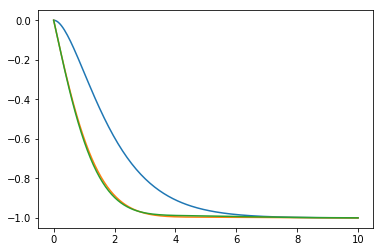

In [20]:
t = np.linspace(0, 10,200)
u = np.ones_like(t)*-1.
X0 = [0.,0.]

#m,b,k = 1., 10., 20.
#pid = [350., 300., 50.] # PID controller is correct
#pid = [300., 0., 0.] # P controller is correct
#pid = [300., 0., 10.] # PD controller is correct
#pid = [30., 70., 0.] # PI is correct

m,b,k = 1, 2., 1.
print('poles:'+str(spring_mass_system(m,b,k).poles))

#pid = [10, 0., 0.]
#pid = [10., 3., 0.] # 3 oscillations
pid = [4., 0., 0.] # start of oscillations, Tu = 3
Ku = 4.; Tu = 3.
pid = [0.6*Ku, 1.2*Ku/Tu, 3.*Ku*Tu/40.]
print('pid:'+str(pid))
#pid = [1., 2., 1.] # not bad
#pid = [1., 1.9, .7] # hard to beat

tout, y, x = signal.lsim(spring_mass_system(m,b,k), u, t, X0=X0)
plt.plot(tout, y)
system = pid_spring_mass([m,b,k],pid)
tout1, y1, x1 = signal.lsim(pid_spring_mass([m,b,k],[1., 1.9, .7]), u, t)
plt.plot(tout1, y1)
tout2, y2, x2 = signal.lsim(pid_spring_mass([m,b,k],[1., 2., .7]), u, t)
plt.plot(tout2, y2)
plt.show()


In [18]:
t = np.linspace(0, 10, 51)

In [19]:
print t

[  0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8   2.    2.2
   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2   4.4   4.6
   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6   6.8   7.
   7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.    9.2   9.4
   9.6   9.8  10. ]


In [56]:
def discrete_spring_mass_system(m,b,k):
    ssA = [[0., 1.], [-k/m, -b/m]]
    ssB = [[0.], [1./m]]
    ssC = [[1., 0.]]
    ssD = 0.
    return signal.dlti(ssA,ssB,ssC,ssD,dt=0.1)

ValueError: x and y must have same first dimension, but have shapes (51,) and (1, 51, 1)

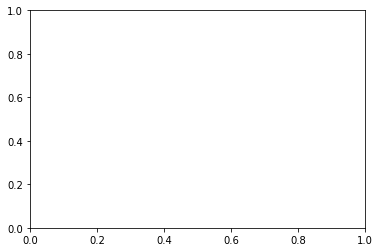

In [58]:
m,b,k = 1., 2., 1.
t = np.linspace(0, 5,100)
u = np.ones_like(t)
initial_state = [0.,0.]
#tout, y, x = signal.dlsim(discrete_spring_mass_system(m,b,k), u,t)
tout,y = signal.dstep(discrete_spring_mass_system(m,b,k),t=t)
plt.plot(tout, y)
plt.show()

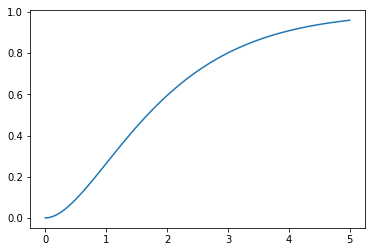

In [66]:
m,b,k = 1., 2., 1.
#tf = ([1.0,], [1.0, -1.0], 0.1)
tf = ([1.0,], [m, b, k])#, 0.1)
t = np.linspace(0, 5,100)
u = np.ones_like(t)
t_out, y = signal.lsim(tf, u, t)[:2]
plt.plot(t_out,y)
plt.show()

In [67]:
u = np.hstack((np.asmatrix(np.linspace(0, 4.0, num=5)).transpose(),
                       0.01 * np.ones((5, 1)),
                       -0.002 * np.ones((5, 1))))
u

matrix([[  0.00000000e+00,   1.00000000e-02,  -2.00000000e-03],
        [  1.00000000e+00,   1.00000000e-02,  -2.00000000e-03],
        [  2.00000000e+00,   1.00000000e-02,  -2.00000000e-03],
        [  3.00000000e+00,   1.00000000e-02,  -2.00000000e-03],
        [  4.00000000e+00,   1.00000000e-02,  -2.00000000e-03]])